In [40]:
# ARIMA Forecasting on Almond Production to 2025, and Honey Production Prediction for 2023
## Sara Slocum

In [2]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from numpy import split
from numpy import array
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sympy.solvers import solve
from sympy import Symbol

In [3]:
# Importing dataframe
Global = pd.read_csv("C:/Users/saslo/Data_Science/DS_Portfolio/Queen_Bees/Datasets/Wrangled_Data/pivotedGlobal.csv")

Global

,Unnamed: 0,Year,"Almonds, Shelled Basis","Apples, Fresh",Barley,"Coffee, Green",Corn,"Dairy, Milk, Fluid","Grapefruit, Fresh","Meat, Swine",Oats,"Oil, Soybean","Oilseed, Rapeseed",Rye,"Walnuts, Inshell Basis"
0,0,1998,235884.0,5282724.0,2.358840e+08,1.415304e+07,4.822010e+09,3.261510e+08,1.850000e+05,4.740312e+12,2.478820e+08,4.176508e+09,5.214000e+06,2.114000e+06,205931.0
1,1,1999,377800.0,5746060.0,3.613620e+08,2.168172e+07,4.800686e+09,7.753400e+07,1.830000e+05,4.476775e+12,2.395490e+08,3.797778e+09,6.622500e+08,2.165000e+06,256734.0
2,2,2000,318900.0,5675890.0,3.037000e+08,1.822200e+07,4.274204e+09,3.320920e+08,1.630000e+05,2.395490e+11,2.518540e+08,3.946939e+09,3.073860e+08,1.707000e+06,216816.0
3,3,2001,376500.0,5065060.0,3.764880e+08,2.258928e+07,3.866379e+09,3.053190e+08,1.630000e+05,2.518540e+11,2.413770e+08,4.354875e+09,3.121800e+08,1.684000e+06,276700.0
4,4,2002,494416.0,4605810.0,4.944160e+08,2.686065e+11,3.988483e+09,8.358100e+07,1.860000e+05,3.871860e+11,2.277670e+08,4.433333e+09,3.320920e+08,2.096000e+06,255825.0
5,5,2003,471740.0,4780600.0,4.585820e+08,2.775984e+10,4.740312e+09,8.782000e+06,1.460000e+05,5.282724e+12,2.562780e+08,4.113333e+09,3.066520e+08,3.320920e+08,295741.0
6,6,2004,462664.0,5683040.0,4.626640e+08,2.323116e+10,4.476775e+09,9.331000e+06,4.463810e+09,3.037000e+11,2.999140e+08,4.287885e+09,5.080200e+08,9.335000e+06,294834.0
7,7,2005,415040.0,5261960.0,3.871860e+08,2.168172e+10,4.734966e+09,9.247000e+06,8.781000e+06,4.822010e+12,2.822600e+08,4.183484e+09,8.028600e+07,4.585820e+08,322100.0
8,8,2006,508023.0,5351610.0,5.282724e+09,3.169634e+11,4.473878e+09,3.610910e+08,9.392000e+06,4.800686e+12,2.957410e+08,4.227338e+09,6.304900e+08,4.699002e+09,317515.0
9,9,2007,630500.0,4154195.0,4.780600e+09,2.880412e+11,4.408118e+09,3.454860e+08,3.290590e+08,4.274204e+12,4.567846e+09,4.150400e+08,6.804000e+08,4.354875e+09,297600.0


In [4]:
# Isolating almonds for ARIMA
justalmonds = Global[['Year', 'Almonds, Shelled Basis']]
justalmonds

,Year,"Almonds, Shelled Basis"
0,1998,235884.0
1,1999,377800.0
2,2000,318900.0
3,2001,376500.0
4,2002,494416.0
5,2003,471740.0
6,2004,462664.0
7,2005,415040.0
8,2006,508023.0
9,2007,630500.0


In [5]:
# Formatting Year to date datatype 
justalmonds['Year'] = pd.to_datetime(justalmonds['Year'], format='%Y')

C:\Users\saslo\AppData\Local\Temp/ipykernel_19240/1640467610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justalmonds['Year'] = pd.to_datetime(justalmonds['Year'], format='%Y')


In [6]:
## Setting Year as index
justalmonds.set_index('Year', inplace=True)
type(justalmonds)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Year'>

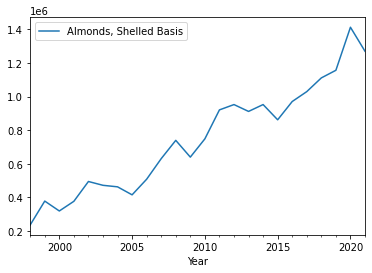

In [7]:
## Looking at linear plot of almond production
justalmonds.plot()

In [8]:
## Linear plot does not look stationary, there seems to be an obvious upward trend in Almond production 

In [9]:
## Testing our finding against Augmented Dickey Fuller test
result=adfuller(justalmonds['Almonds, Shelled Basis'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.23076651018098684
n_lags: 0.9347535822425852
p-value: 0.9347535822425852
Critial Values:
   1%, -3.9240193847656246
Critial Values:
   5%, -3.0684982031250003
Critial Values:
   10%, -2.67389265625


In [10]:
## Much to my expectation, the results of our ADF test is that our data is non-stationary. We must fail to reject the Null hypothesis as our p-value is not significant
## and our ADF Statistic is higher than our critical values. In other words, the Almond time series production data from 1998-2021 has some time-dependent structure 
## and does not have constant variance over time.

In [11]:
justalmonds

,"Almonds, Shelled Basis"
Year,
1998-01-01,235884.0
1999-01-01,377800.0
2000-01-01,318900.0
2001-01-01,376500.0
2002-01-01,494416.0
2003-01-01,471740.0
2004-01-01,462664.0
2005-01-01,415040.0
2006-01-01,508023.0


In [12]:
# Splitting the data for training and testing
train = justalmonds[:20]
test = justalmonds[-4:]
train
test

,"Almonds, Shelled Basis"
Year,
2018-01-01,1111300.0
2019-01-01,1156660.0
2020-01-01,1412940.0
2021-01-01,1270060.0


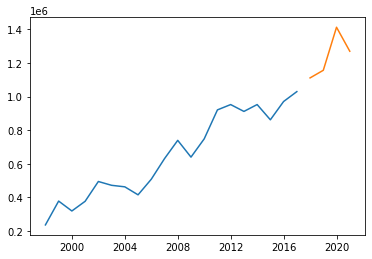

In [13]:
plt.plot(train)
plt.plot(test)

In [14]:
## Running auto_arima to obtain p, d, q variables
model = pm.auto_arima(justalmonds['Almonds, Shelled Basis'], seasonal=False)
model

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [15]:
# p=0 d=1 q=0

In [16]:
# Manually Building Auto ARIMA model
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=182.807, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=184.167, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=184.574, Time=0.03 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=182.066, Time=0.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=184.066, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=183.980, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=182.021, Time=0.02 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=183.977, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=185.977, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=184.277, Time=0.03 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=183.622, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 0.504 seconds


In [17]:
# Best model confirmed p=0 d=1 q=0, our ARIMA class is I(1)

In [18]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   20
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -89.011
Date:                              Sun, 17 Jul 2022   AIC                            182.021
Time:                                      19:03:44   BIC                            181.913
Sample:                                           0   HQIC                           180.684
                                               - 20                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.5409      1.158     -0.467      0.640      -2.811       1.729
sigma2      6.646e+09    1.3e-12    5.1e+21      0.000    6.65e+09    6.65e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.93
Prob(Q):                              0.65   Prob(JB):                         0.63
Heteroskedasticity (H):               1.65   Skew:                            -0.31
Prob(H) (two-sided):                  0.75   Kurtosis:                         1.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [19]:
# Forecasting on the test data
prediction = pd.DataFrame(arima_model.predict(n_periods = 4),index=test.index)
prediction.columns = ['predicted_values']
prediction

,predicted_values
Year,
2018-01-01,1.083727e+06
2019-01-01,1.154956e+06
2020-01-01,1.218290e+06
2021-01-01,1.160249e+06


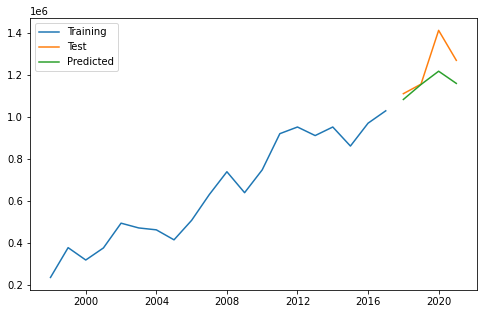

In [20]:
# Plotting against actual values
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [21]:
# Looking at R2 score
test['predicted_values'] = prediction
r2_score(test['Almonds, Shelled Basis'], test['predicted_values'])

C:\Users\saslo\AppData\Local\Temp/ipykernel_19240/3336541158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_values'] = prediction


0.06611695080652358

In [22]:
# Not too far from zero! We will take the R2 score for now and roll with it!!

ValueError: could not broadcast input array from shape (7,) into shape (11,)

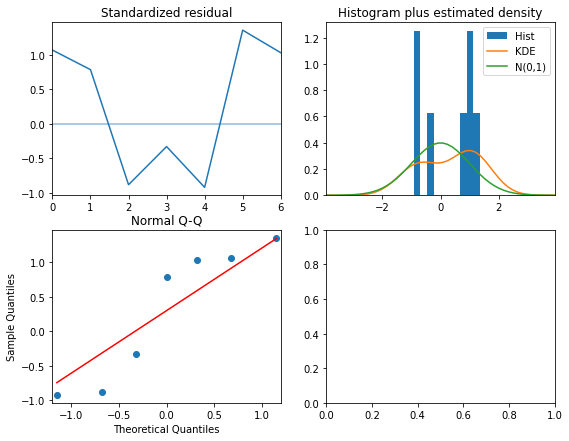

In [30]:
# Interpreting residual plots
arima_model.plot_diagnostics(figsize=(9,7))
plt.show()

In [31]:
### In the upper left we see the mean is centered at 0, and the variance looks pretty equal
### In the upper right, we can see how our predictions could be negatively impacted, as the assumption is normal distribution but our actual density line is slightly off of normal distribution, and skewed to the right.
### Bottom left points, not as close to the red line as we'd like, but still in the general direction
### In the bottom right, we are getting the value error, and go ahead and ignore it. 
### Fit doesn't seem to be too off, so we will go with it...

In [33]:
# Creating new dataframe for future forecasting
future = {'Year':  [2022, 2023, 2024, 2025],
        'predicted_values': ['NaN', 'NaN', 'NaN', 'NaN']}

future = pd.DataFrame(future)
print (future)

   Year predicted_values
0  2022              NaN
1  2023              NaN
2  2024              NaN
3  2025              NaN


In [34]:
# Formatting Year to date datatype 
future['Year'] = pd.to_datetime(future['Year'], format='%Y')

In [35]:
## Setting Year as index
future.set_index('Year', inplace=True)
type(future)
future

,predicted_values
Year,
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN


In [36]:
# Appending Future DF to justalmonds DF
futureprediction = justalmonds.append(future)
futureprediction

,"Almonds, Shelled Basis",predicted_values
Year,,
1998-01-01,235884.0,NaN
1999-01-01,377800.0,NaN
2000-01-01,318900.0,NaN
2001-01-01,376500.0,NaN
2002-01-01,494416.0,NaN
2003-01-01,471740.0,NaN
2004-01-01,462664.0,NaN
2005-01-01,415040.0,NaN
2006-01-01,508023.0,NaN


In [37]:
# Setting number of points to forecast
h=28
# Generating forecast
forecast2 = pd.DataFrame(arima_model.predict(h), index=futureprediction.index)
forecast2.columns = ['predicted_values']
forecast2

,predicted_values
Year,
1998-01-01,1.083727e+06
1999-01-01,1.154956e+06
2000-01-01,1.218290e+06
2001-01-01,1.160249e+06
2002-01-01,1.283454e+06
2003-01-01,1.410250e+06
2004-01-01,1.408491e+06
2005-01-01,1.405393e+06
2006-01-01,1.460294e+06


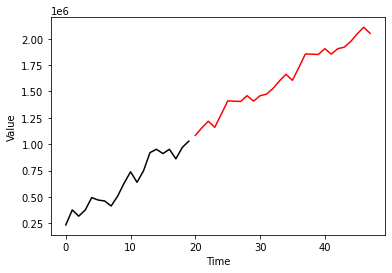

In [38]:
# Visualize forecast with training data
time = np.arange(train.shape[0] + h)

# Slice the x-axis to only plot the training data as the color black
plt.plot(time[:train.shape[0]], train, c = 'black')

# Slice the x-axis to plot our forecast after the training data as the color red
plt.plot(time[train.shape[0]:], forecast2, c = 'red')

# Set axis labels
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [39]:
# 2023 Honey Prediction Values based off of Almond Commodity Forecasting, 
## Using Almonds ~ Honey linear regression equation performed in nuts_oilsAnalysis: y = -15.02(Honey) + 1737890.72

### US Almond production for 2023 is forecasted at 2.045392e+06, or 2,045,392 Metric Tons
### 2,045,392 = -15.02(Honey) + 1737890.72
### -20,472.79 = 2023 MT Honey Prediction based on Almond Forecasting 
### Based off of ARIMA Almond forecasting and the linear relationship found between US almond and honey production...
### Honey production is forecasting to fall to zero and cease completely in 2023 :(